In [1]:
# =============================================================================
# Cell 1: Imports and Path Definitions
# =============================================================================
import os
from PIL import Image
import matplotlib.pyplot as plt

import sys
sys.path.append('../') # Go up one level to the project root
from src.ela import generate_ela

# Define the project paths, just like in the first notebook
CASIA_PATH = '../data/CASIA2'
tampered_path = os.path.join(CASIA_PATH, 'Tp')

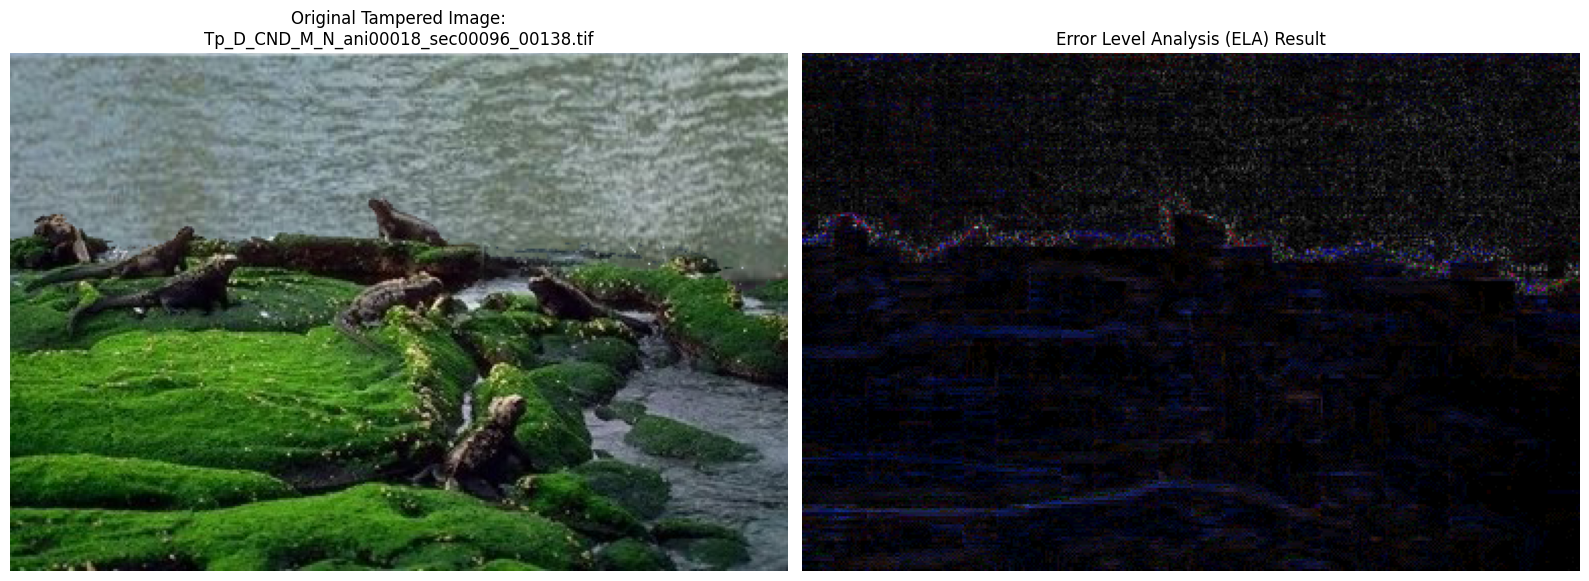

In [2]:
# =============================================================================
# Cell 2: Perform ELA on a Tampered Image
# =============================================================================

BASE_FILENAME = 'Tp_D_CND_M_N_ani00018_sec00096_00138'
TAMPERED_IMG_EXTENSION = '.tif'

# Construct the full path to the tampered image
tampered_img_name = BASE_FILENAME + TAMPERED_IMG_EXTENSION
tampered_img_path = os.path.join(tampered_path, tampered_img_name)

# --- Run our ELA function ---
ela_result_image = generate_ela(tampered_img_path, quality=90)

if ela_result_image:
    # Load the original tampered image for comparison
    original_tampered_img = Image.open(tampered_img_path)

    # Display the results
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    axes[0].imshow(original_tampered_img)
    axes[0].set_title(f"Original Tampered Image:\n{tampered_img_name}")
    axes[0].axis('off')

    axes[1].imshow(ela_result_image)
    axes[1].set_title("Error Level Analysis (ELA) Result")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

### Analysis of the ELA Result

**What is ELA?**
Error Level Analysis (ELA) works by re-saving an image at a known JPEG compression level (e.g., 90%). In a normal, unedited JPEG, all parts of the image should have been compressed a similar number of times. This means they should have roughly similar error levels after re-compression.

**What to Look For in the ELA Image:**
1.  **High-Contrast Areas:** A forged region, often copied from another image, will have a different compression history. When re-compressed, it will produce a significantly different "error level" than the rest of the image. This appears as a region that is much brighter or has a different texture than its surroundings in the ELA result.
2.  **Edges vs. Surfaces:** In a normal image, the highest error levels (brightest parts) should appear on high-contrast edges and complex textures. Smooth surfaces like a clear sky or a wall should be very dark. If you see a smooth area that is suddenly very bright in the ELA image, it's highly suspicious.

Look at the ELA result above. Can you spot any areas that look "out of place" or are significantly brighter than their surroundings? That is likely the manipulated region.